In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Load data

In [3]:
data = pd.read_csv("./Monthly_data_cmo.csv")

In [4]:
data.head()

,APMC,Commodity,Year,Month,arrivals_in_qtl,min_price,max_price,modal_price,date,district_name,state_name
0,Ahmednagar,Bajri,2015,April,79,1406,1538,1463,2015-04,Ahmadnagar,Maharashtra
1,Ahmednagar,Bajri,2016,April,106,1788,1925,1875,2016-04,Ahmadnagar,Maharashtra
2,Ahmednagar,Wheat(Husked),2015,April,1253,1572,1890,1731,2015-04,Ahmadnagar,Maharashtra
3,Ahmednagar,Wheat(Husked),2016,April,387,1750,2220,1999,2016-04,Ahmadnagar,Maharashtra
4,Ahmednagar,Sorgum(Jawar),2015,April,3825,1600,2200,1900,2015-04,Ahmadnagar,Maharashtra


In [5]:
data.describe()

,Year,arrivals_in_qtl,min_price,max_price,modal_price
count,62429.000000,6.242900e+04,6.242900e+04,6.242900e+04,62429.000000
mean,2015.337503,6.043088e+03,2.945228e+03,3.688814e+03,3296.003989
std,0.690451,3.470331e+04,1.318396e+04,7.662962e+03,3607.792534
min,2014.000000,1.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,2015.000000,3.800000e+01,1.250000e+03,1.600000e+03,1450.000000
50%,2015.000000,2.110000e+02,1.976000e+03,2.797000e+03,2425.000000
75%,2016.000000,1.364000e+03,3.900000e+03,4.647000e+03,4257.000000
max,2016.000000,1.450254e+06,3.153038e+06,1.600090e+06,142344.000000


In [6]:
data['modal_price_per_qtl'] = data['modal_price']/data['arrivals_in_qtl']

In [7]:
data['min_price_per_qtl'] = data['min_price']/data['arrivals_in_qtl']

In [8]:
data['max_price_per_qtl'] = data['max_price']/data['arrivals_in_qtl']

In [9]:
data.head()

,APMC,Commodity,Year,Month,arrivals_in_qtl,min_price,max_price,modal_price,date,district_name,state_name,modal_price_per_qtl,min_price_per_qtl,max_price_per_qtl
0,Ahmednagar,Bajri,2015,April,79,1406,1538,1463,2015-04,Ahmadnagar,Maharashtra,18.518987,17.797468,19.468354
1,Ahmednagar,Bajri,2016,April,106,1788,1925,1875,2016-04,Ahmadnagar,Maharashtra,17.688679,16.867925,18.160377
2,Ahmednagar,Wheat(Husked),2015,April,1253,1572,1890,1731,2015-04,Ahmadnagar,Maharashtra,1.381484,1.254589,1.508380
3,Ahmednagar,Wheat(Husked),2016,April,387,1750,2220,1999,2016-04,Ahmadnagar,Maharashtra,5.165375,4.521964,5.736434
4,Ahmednagar,Sorgum(Jawar),2015,April,3825,1600,2200,1900,2015-04,Ahmadnagar,Maharashtra,0.496732,0.418301,0.575163


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62429 entries, 0 to 62428
Data columns (total 14 columns):
APMC                   62429 non-null object
Commodity              62429 non-null object
Year                   62429 non-null int64
Month                  62429 non-null object
arrivals_in_qtl        62429 non-null int64
min_price              62429 non-null int64
max_price              62429 non-null int64
modal_price            62429 non-null int64
date                   62429 non-null object
district_name          62429 non-null object
state_name             62429 non-null object
modal_price_per_qtl    62429 non-null float64
min_price_per_qtl      62429 non-null float64
max_price_per_qtl      62429 non-null float64
dtypes: float64(3), int64(5), object(6)
memory usage: 6.7+ MB


In [11]:
data['date'] = pd.to_datetime(data['date'])

In [66]:
#data['date']

# Outliers Test

In [13]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(data['modal_price_per_qtl']))
print(z)


[ 0.25892865  0.25988133  0.27859182 ...,  0.12054189  0.26197785
  0.23262279]


In [14]:
threshold = 3
arr = np.where(z > 3)
print(arr)



(array([   11,    15,   128, ..., 62141, 62283, 62309]),)


There are outliers.

# Further feature extraction

In [15]:
data.describe()

,Year,arrivals_in_qtl,min_price,max_price,modal_price,modal_price_per_qtl,min_price_per_qtl,max_price_per_qtl
count,62429.000000,6.242900e+04,6.242900e+04,6.242900e+04,62429.000000,62429.000000,62429.000000,62429.000000
mean,2015.337503,6.043088e+03,2.945228e+03,3.688814e+03,3296.003989,244.189124,236.603239,254.183979
std,0.690451,3.470331e+04,1.318396e+04,7.662962e+03,3607.792534,871.560348,905.284536,887.886728
min,2014.000000,1.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,2015.000000,3.800000e+01,1.250000e+03,1.600000e+03,1450.000000,1.452915,1.159502,1.713154
50%,2015.000000,2.110000e+02,1.976000e+03,2.797000e+03,2425.000000,10.178571,8.627778,11.627907
75%,2016.000000,1.364000e+03,3.900000e+03,4.647000e+03,4257.000000,73.529412,65.625000,82.352941
max,2016.000000,1.450254e+06,3.153038e+06,1.600090e+06,142344.000000,25440.200000,75002.250000,25250.000000


In [16]:
type(data.date)

pandas.core.series.Series

## Data Preprocessing

In [17]:
len(data['Commodity'].unique())

352

In [18]:
data.columns.values

array(['APMC', 'Commodity', 'Year', 'Month', 'arrivals_in_qtl',
       'min_price', 'max_price', 'modal_price', 'date', 'district_name',
       'state_name', 'modal_price_per_qtl', 'min_price_per_qtl',
       'max_price_per_qtl'], dtype=object)

In [19]:
# Importing LabelEncoder and initializing it
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [20]:
for col in data.columns.values:
       # Encoding only categorical variables
       if data[col].dtypes=='object':
       # Using whole data to form an exhaustive list of levels
           data2=data[col].append(data[col])
           le.fit(data2.values)
           data[col]=le.transform(data[col])
           #data[col]=le.transform(X_test[col])

In [21]:
data

,APMC,Commodity,Year,Month,arrivals_in_qtl,min_price,max_price,modal_price,date,district_name,state_name,modal_price_per_qtl,min_price_per_qtl,max_price_per_qtl
0,4,24,2015,0,79,1406,1538,1463,2015-04-01,0,0,18.518987,17.797468,19.468354
1,4,24,2016,0,106,1788,1925,1875,2016-04-01,0,0,17.688679,16.867925,18.160377
2,4,348,2015,0,1253,1572,1890,1731,2015-04-01,0,0,1.381484,1.254589,1.508380
3,4,348,2016,0,387,1750,2220,1999,2016-04-01,0,0,5.165375,4.521964,5.736434
4,4,310,2015,0,3825,1600,2200,1900,2015-04-01,0,0,0.496732,0.418301,0.575163
5,4,310,2016,0,2093,1695,2454,2119,2016-04-01,0,0,1.012422,0.809842,1.172480
6,4,200,2015,0,75,1345,1401,1373,2015-04-01,0,0,18.306667,17.933333,18.680000
7,4,200,2016,0,155,1367,1392,1375,2016-04-01,0,0,8.870968,8.819355,8.980645
8,4,134,2015,0,1794,3533,3762,3647,2015-04-01,0,0,2.032887,1.969342,2.096990
9,4,134,2016,0,630,4790,5553,5216,2016-04-01,0,0,8.279365,7.603175,8.814286


# outliers

In [22]:
from sklearn.neighbors import LocalOutlierFactor
X = data.loc[:, 'Commodity':'max_price_per_qtl':10]
#X

In [23]:
n_outliers = len(X)
ground_truth = np.ones(len(X), dtype=int)
ground_truth[-n_outliers:] = -1

In [24]:
clf = LocalOutlierFactor()

In [25]:
y_pred = clf.fit_predict(X)
n_errors = (y_pred != ground_truth).sum()
X_scores = clf.negative_outlier_factor_

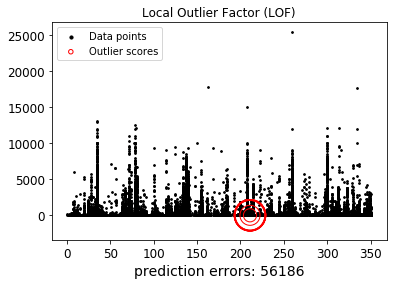

In [26]:
plt.title("Local Outlier Factor (LOF)")
plt.scatter(X['Commodity'], X['modal_price_per_qtl'], color='k', s=3., label='Data points')
# plot circles with radius proportional to the outlier scores
radius = (X_scores.max() - X_scores) / (X_scores.max() - X_scores.min())
plt.scatter(X['Commodity'], X['modal_price_per_qtl'], s=1000 * radius, edgecolors='r',
            facecolors='none', label='Outlier scores')
plt.axis('tight')
#plt.xlim(np.arange(0:352: 1))
#plt.ylim((-10, 6.5e3))
plt.xlabel("prediction errors: %d" % (n_errors))
legend = plt.legend(loc='upper left')
legend.legendHandles[0]._sizes = [10]
legend.legendHandles[1]._sizes = [20]
plt.show()

In [27]:
data['modal_price'].autocorr()

0.52996082096193375

In [28]:
"""X = data['date']
y = data['modal_price']
plt.plot(X, y)
plt.xticks(rotation = 90)
plt.show()"""

"X = data['date']\ny = data['modal_price']\nplt.plot(X, y)\nplt.xticks(rotation = 90)\nplt.show()"

# Trends

In [29]:
data['Commodity'].max()

351

In [30]:
commodity_24 = data.loc[data['Commodity'] == 24]

In [31]:
#commodity_24
commodity_24['date'].min(), commodity_24['date'].max()

(Timestamp('2014-09-01 00:00:00'), Timestamp('2016-10-01 00:00:00'))

In [32]:
commodity_24 = commodity_24.groupby('date')['modal_price_per_qtl'].sum().reset_index()

In [33]:
commodity_24 = commodity_24.set_index('date')
commodity_24.index

DatetimeIndex(['2014-09-01', '2014-10-01', '2014-11-01', '2014-12-01',
               '2015-01-01', '2015-02-01', '2015-03-01', '2015-04-01',
               '2015-05-01', '2015-06-01', '2015-07-01', '2015-08-01',
               '2015-09-01', '2015-10-01', '2015-11-01', '2015-12-01',
               '2016-01-01', '2016-02-01', '2016-03-01', '2016-04-01',
               '2016-05-01', '2016-06-01', '2016-07-01', '2016-08-01',
               '2016-09-01', '2016-10-01'],
              dtype='datetime64[ns]', name='date', freq=None)

In [34]:
y = commodity_24['modal_price_per_qtl'].resample('MS').mean()

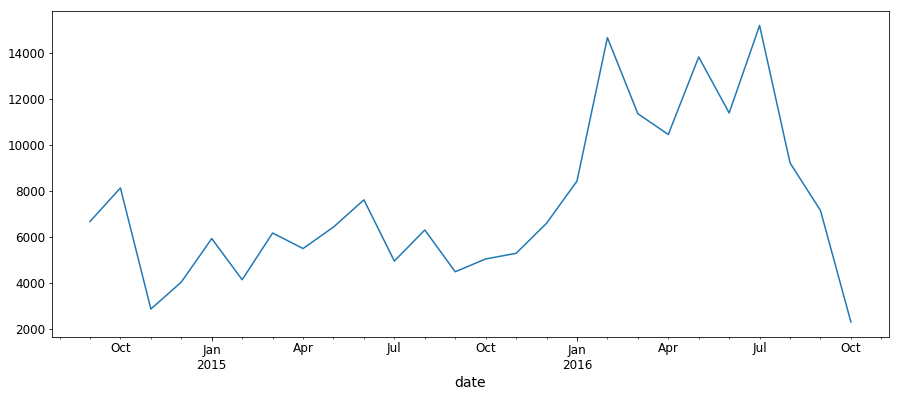

In [35]:
y.plot(figsize=(15, 6))
plt.show()

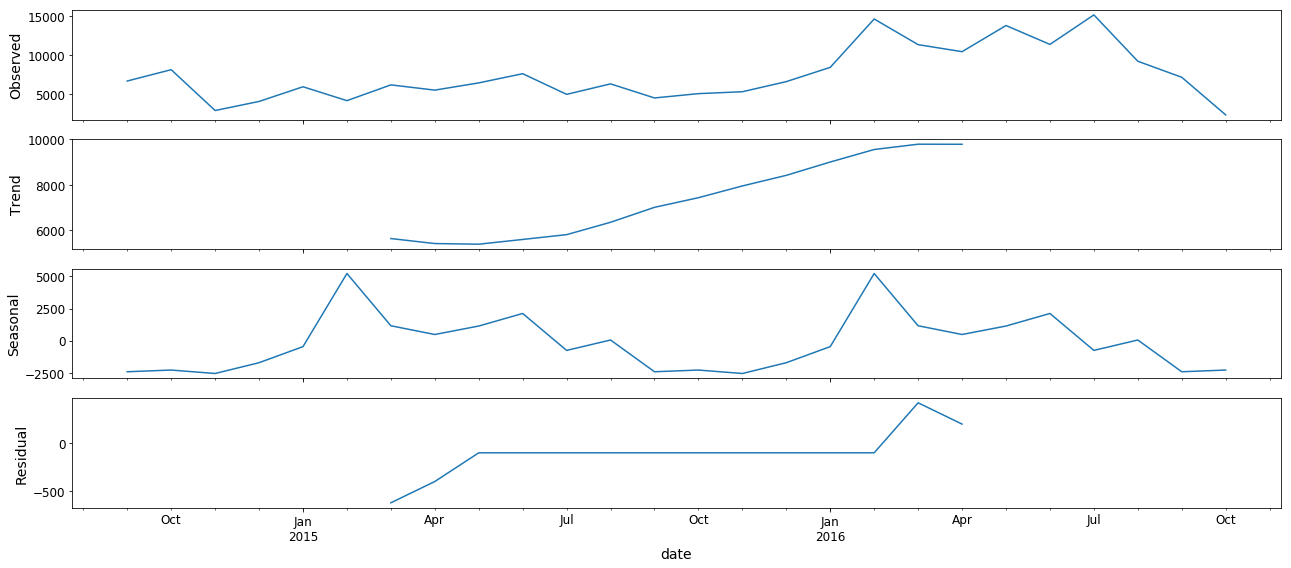

In [36]:
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

24


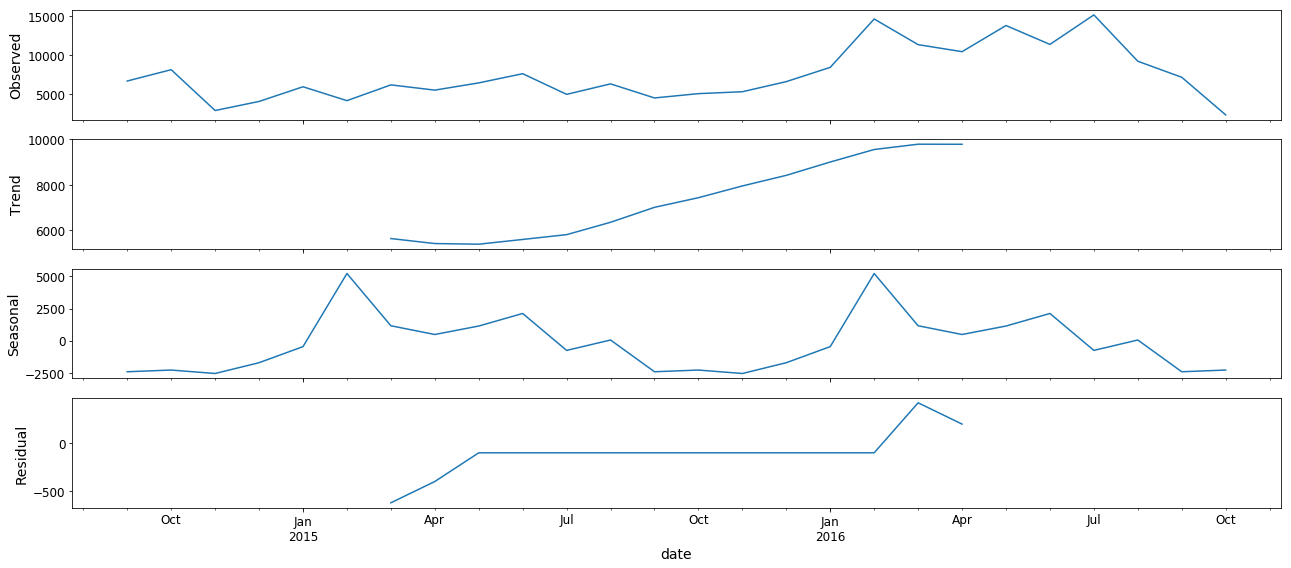

348


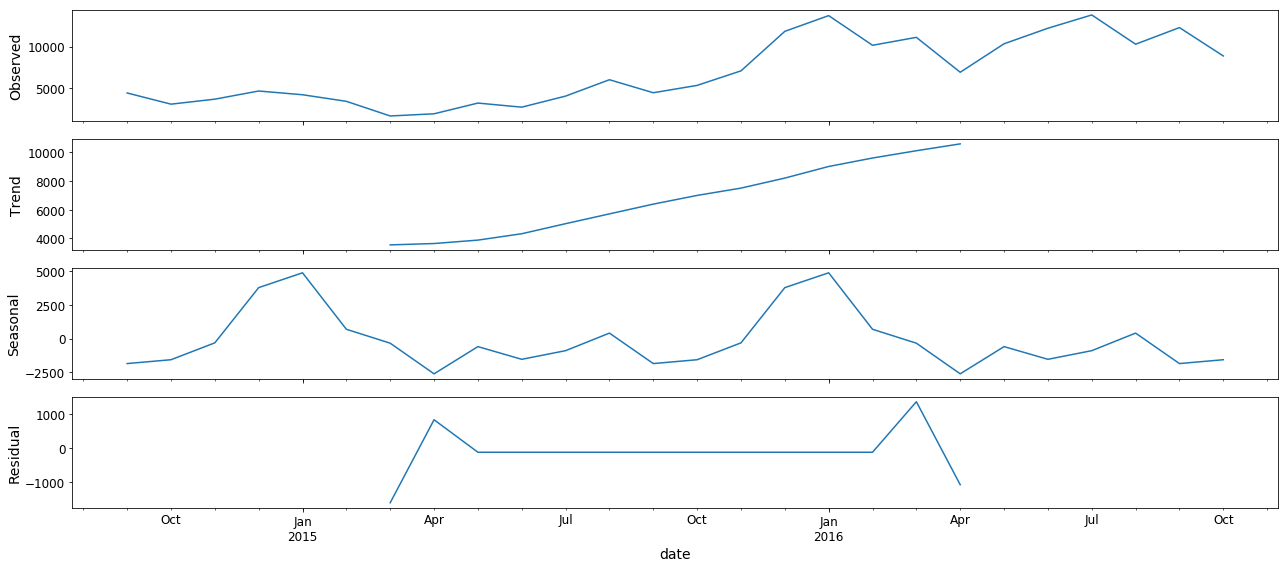

310


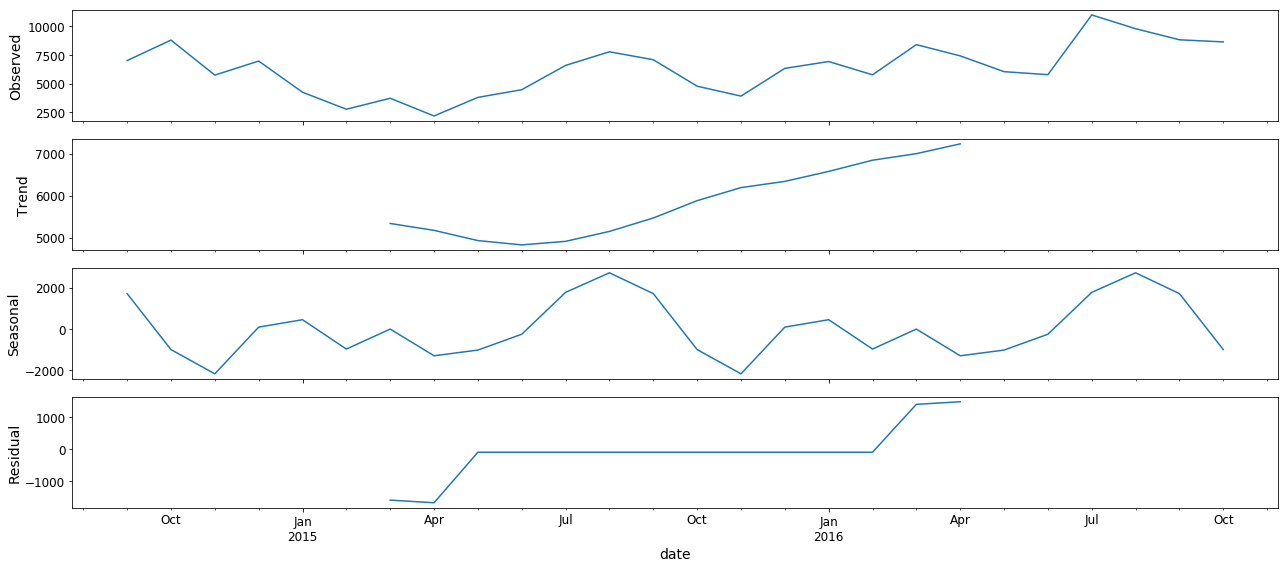

200


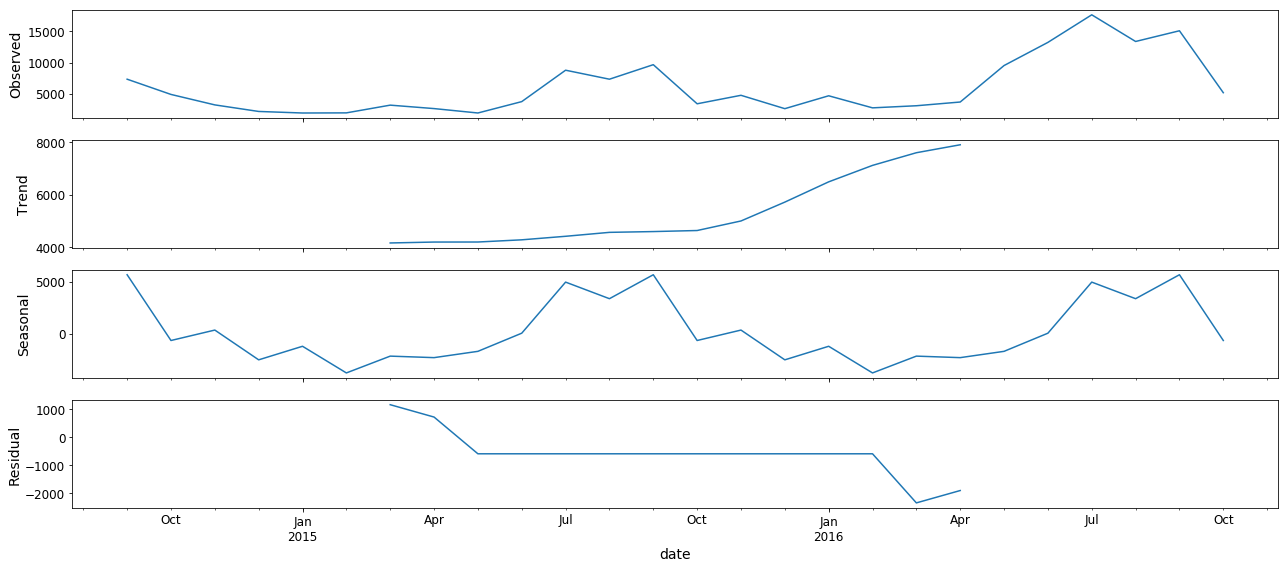

134


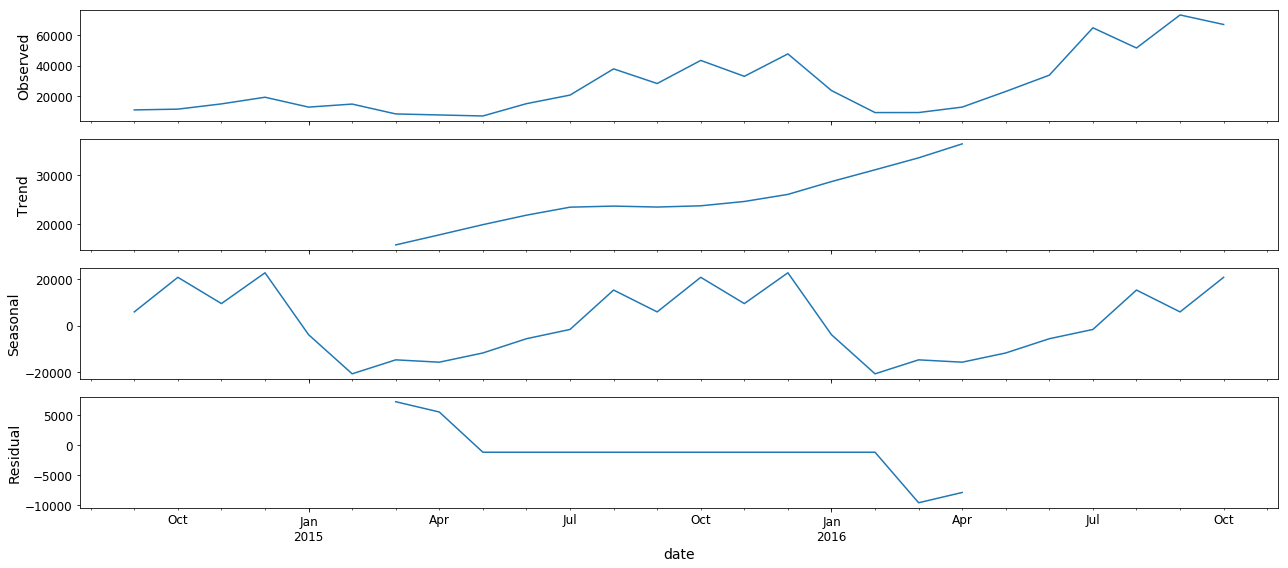

154


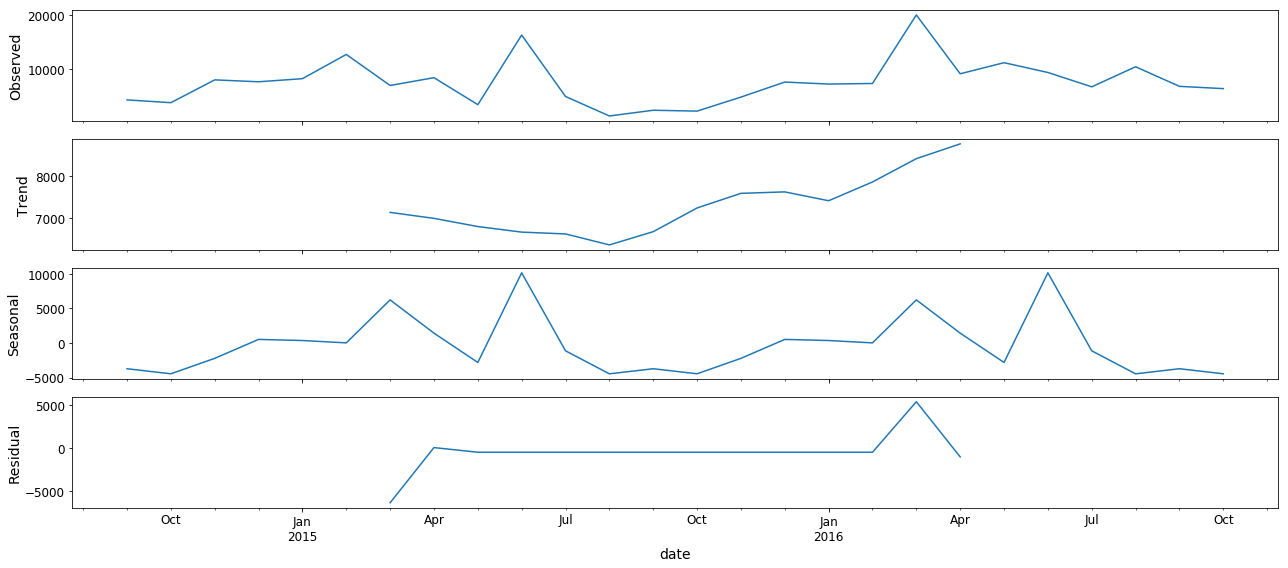

208


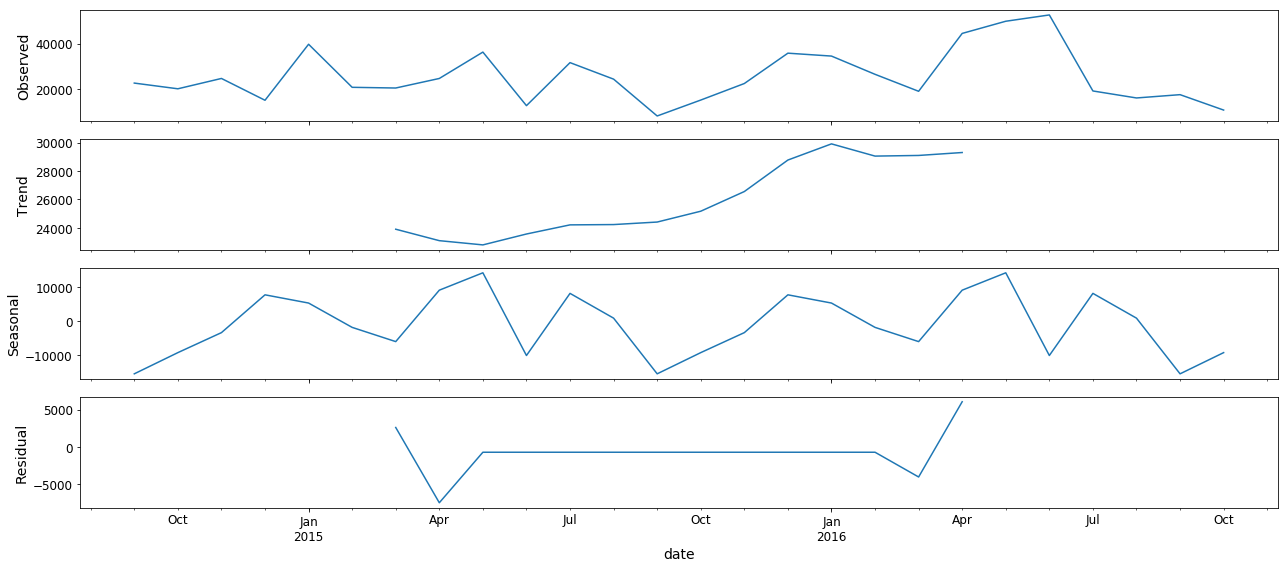

259


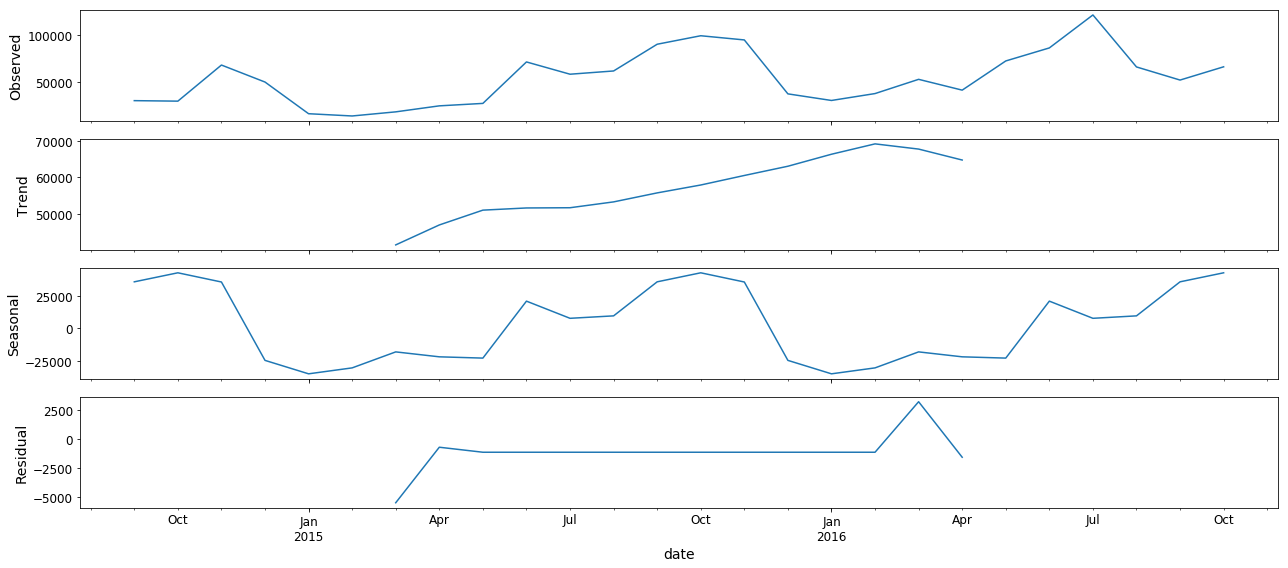

35


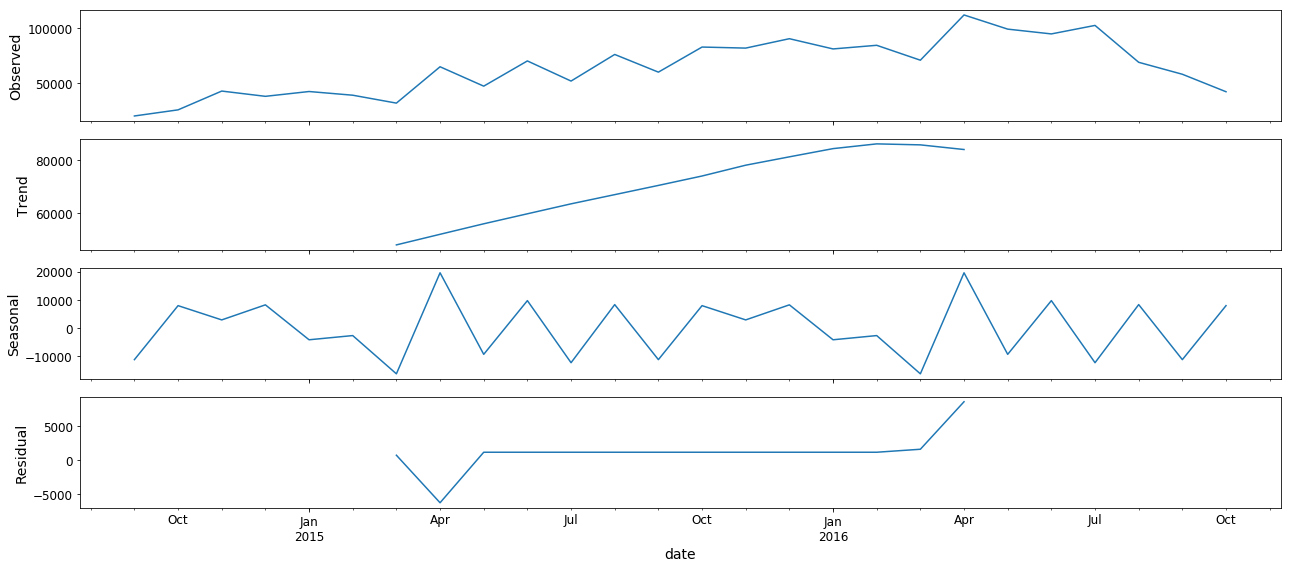

67


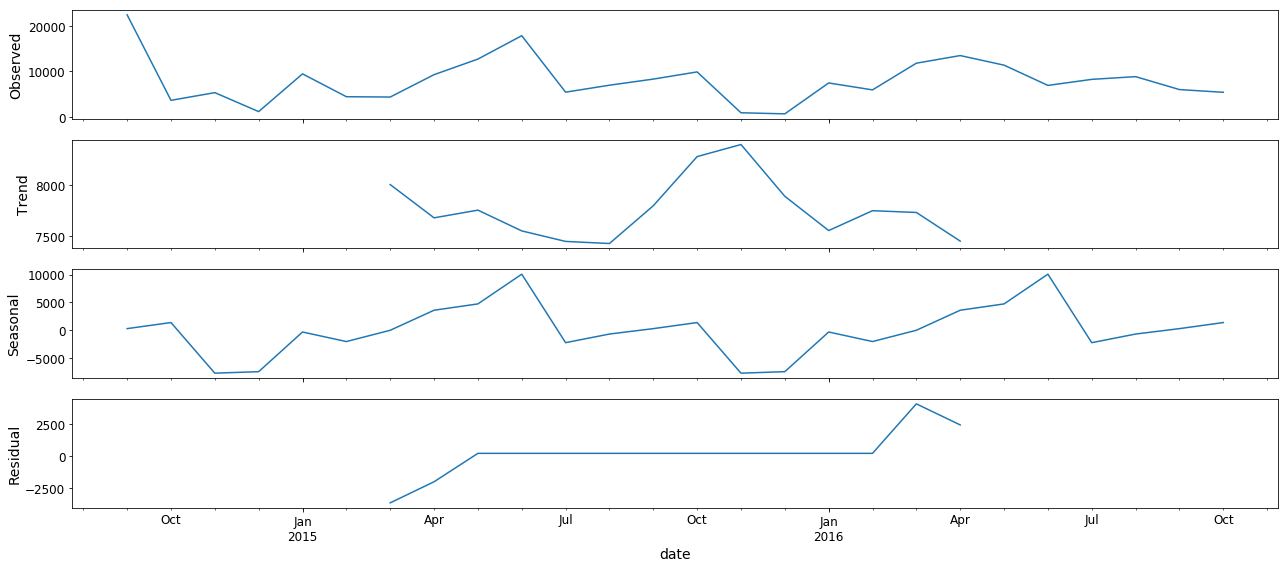

312


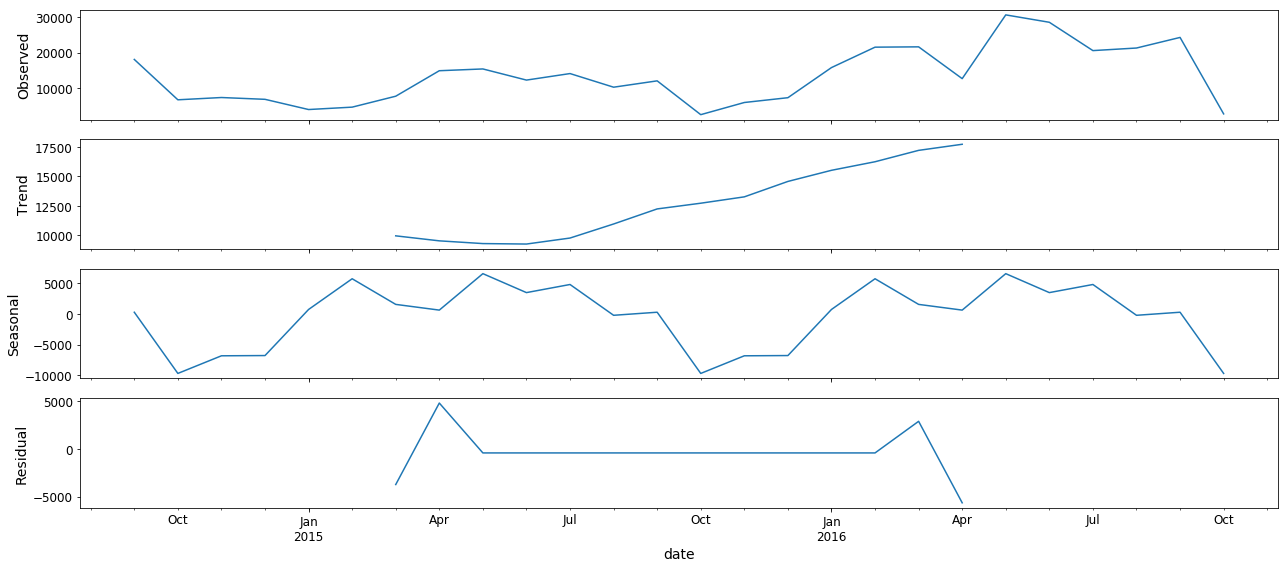

161


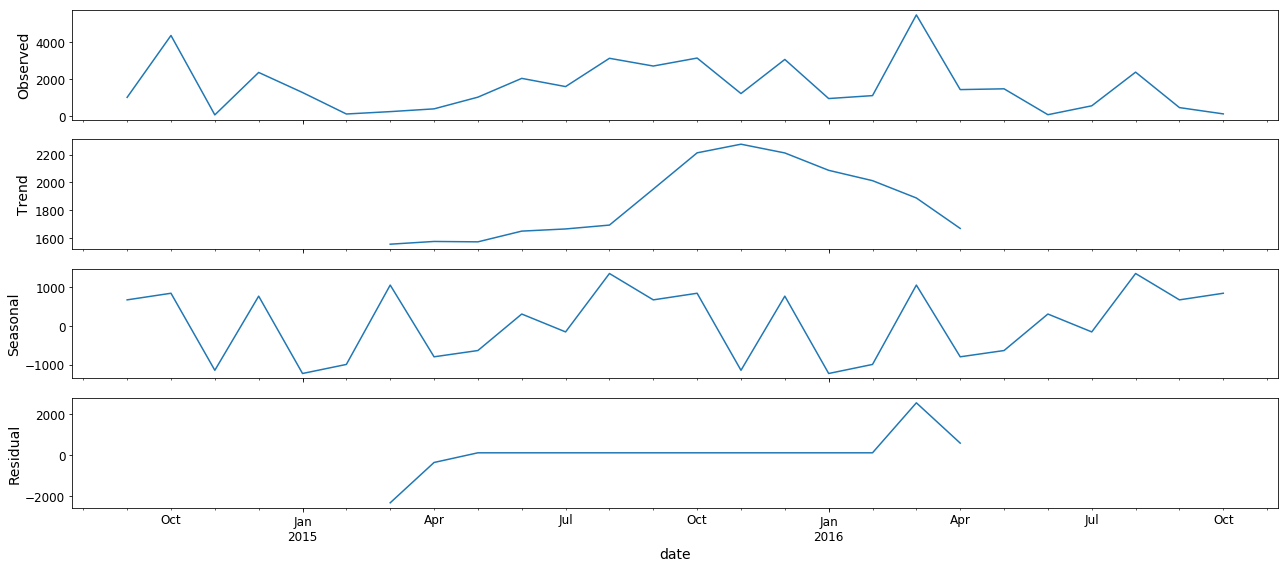

182


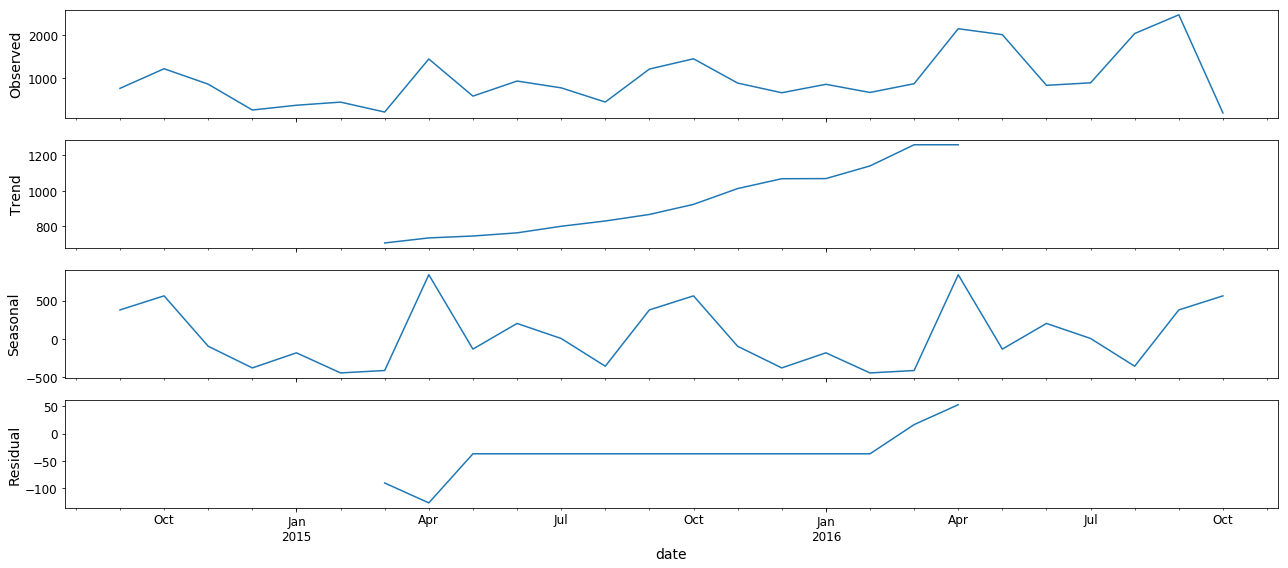

130


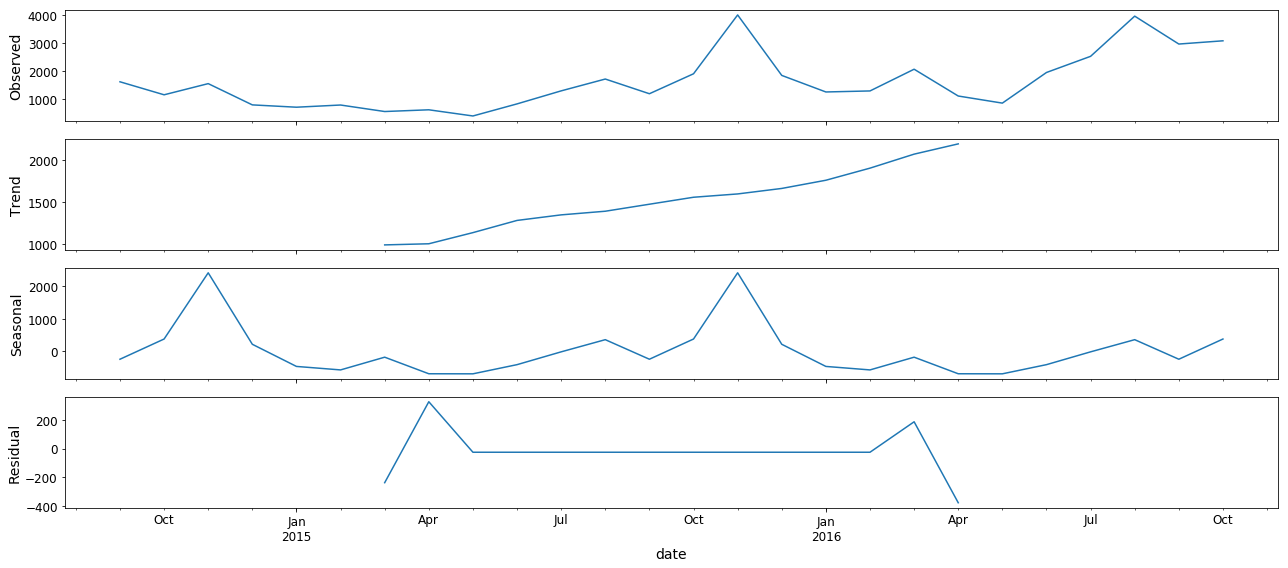

264


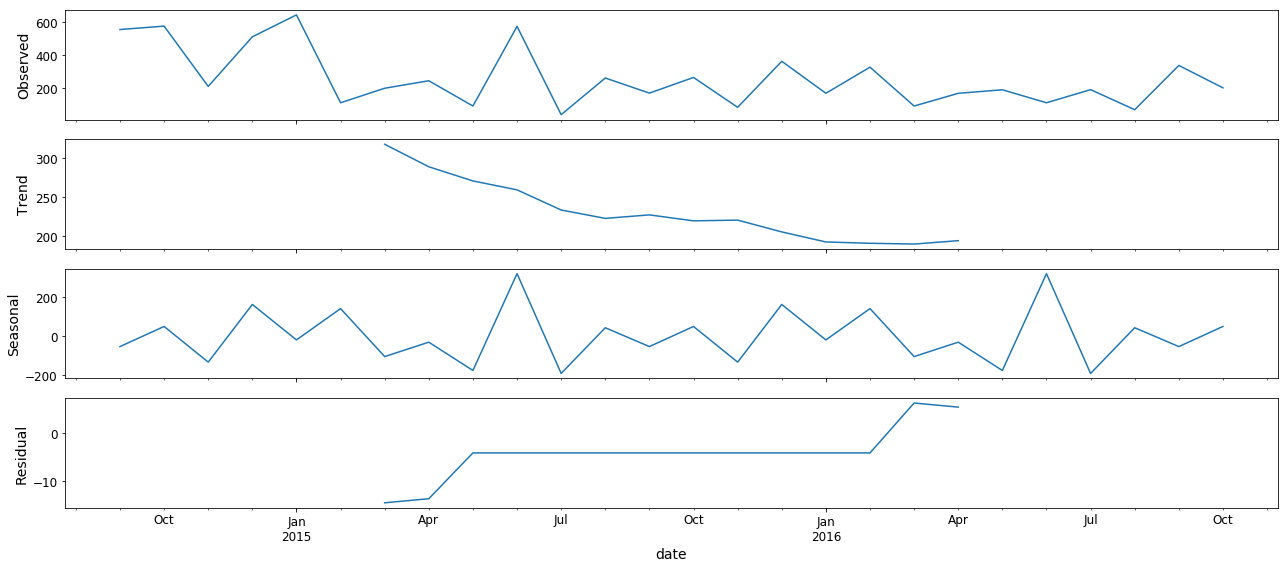

179


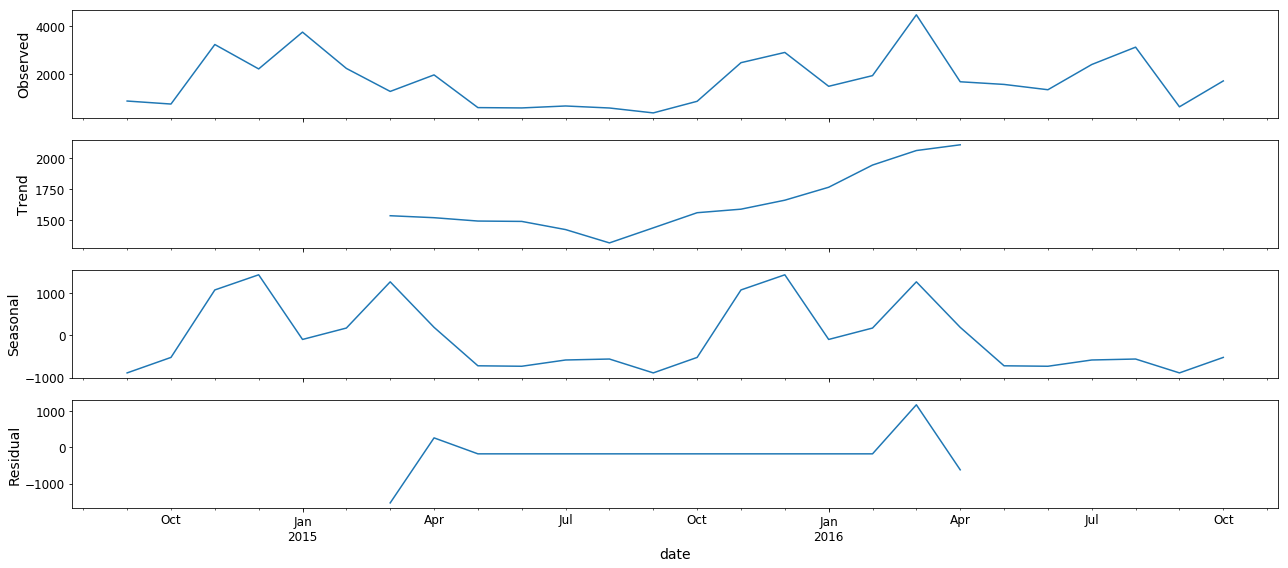

102


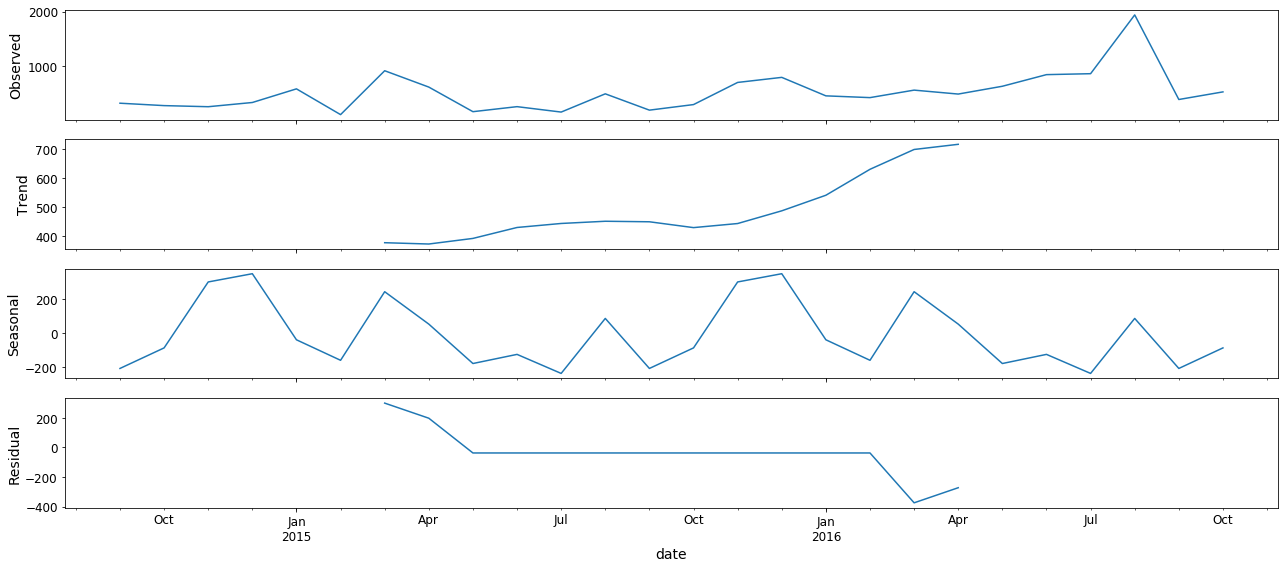

65


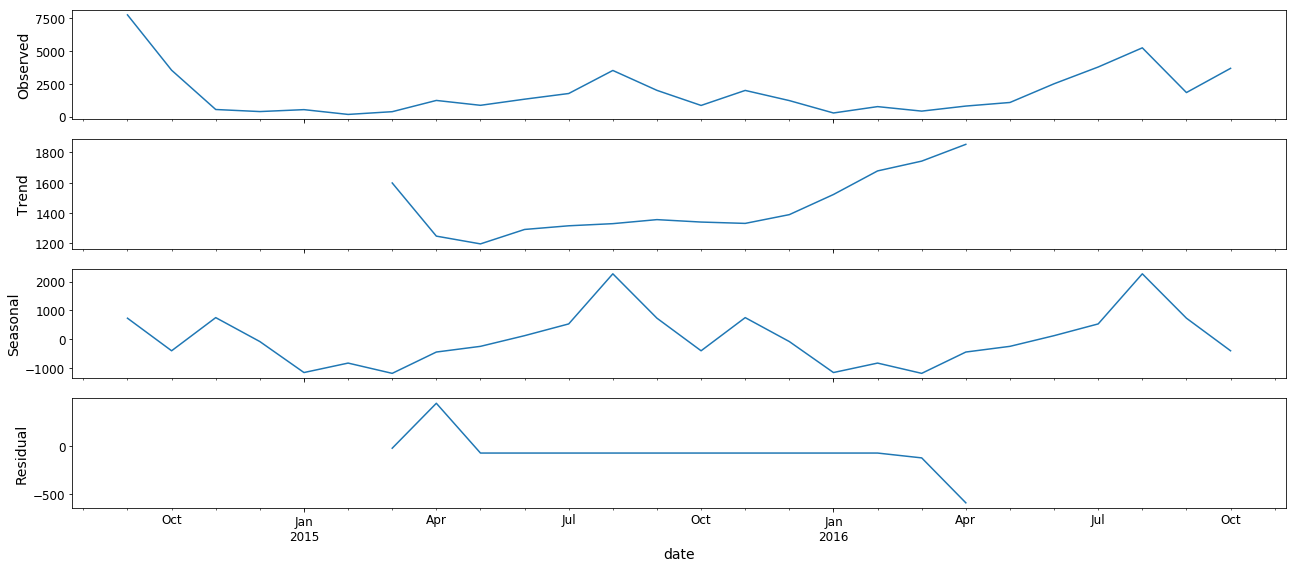

74


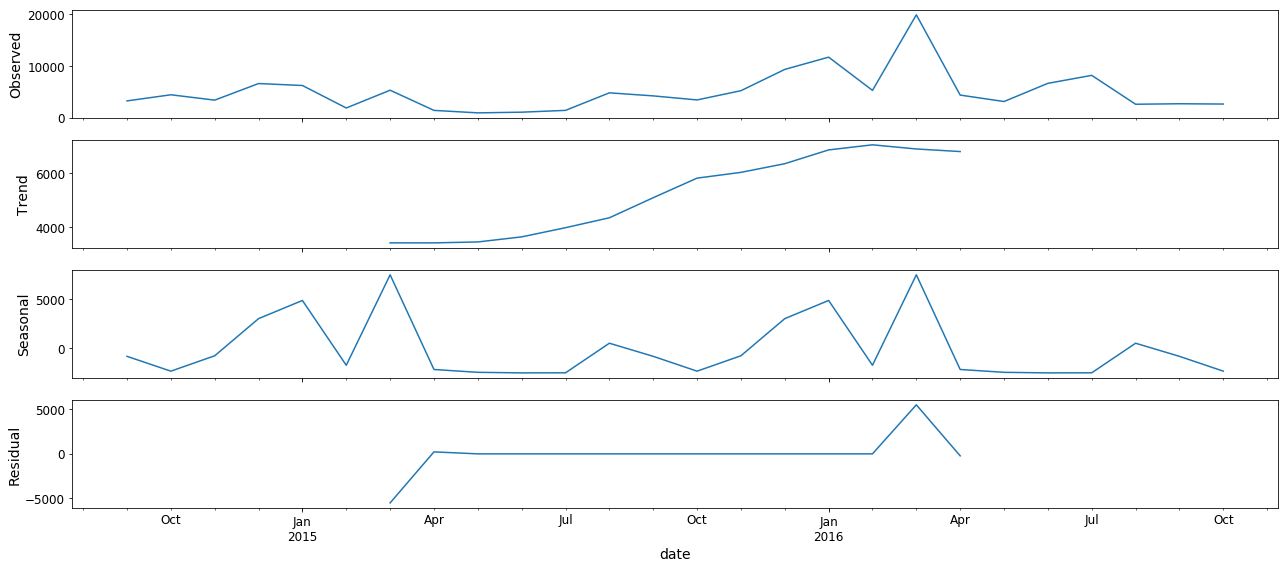

126


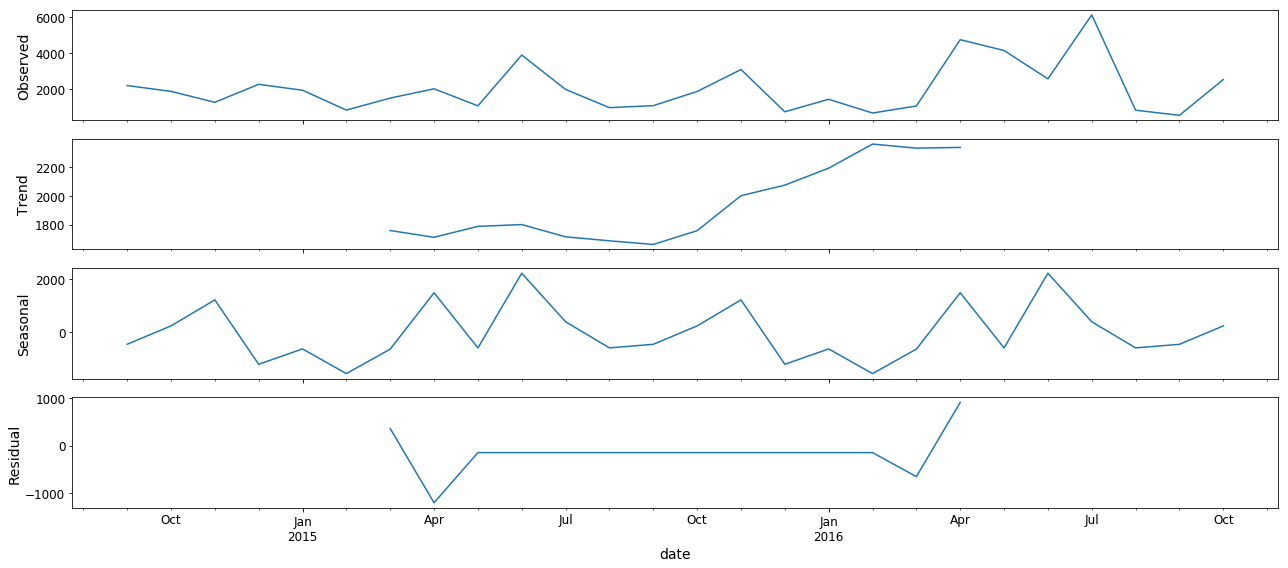

128


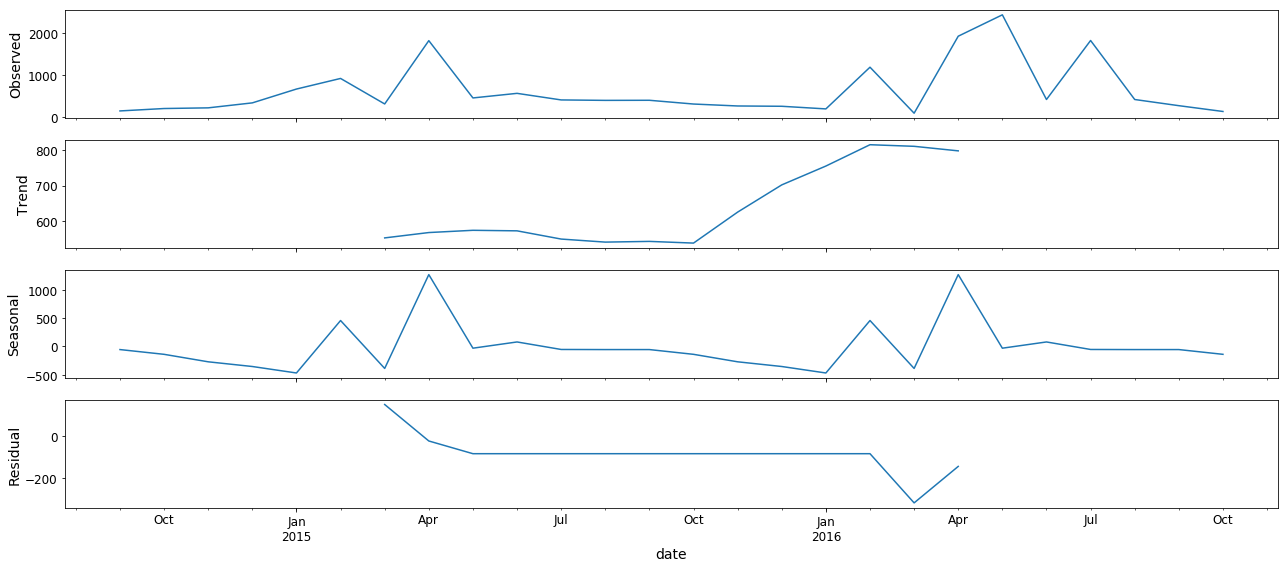

206


TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [64]:
#type(data['Commodity'])
for commodity in data['Commodity'].unique():
    print(commodity)
    com = data.loc[data['Commodity'] == commodity]
    com = com.groupby('date')['modal_price_per_qtl'].sum().reset_index()
    com = com.set_index('date')
    y = com['modal_price_per_qtl'].resample('MS').mean()
    y = y.fillna(y.mean)
    decomposition = sm.tsa.seasonal_decompose(y, model='additive')
    fig = decomposition.plot()
    plt.show()
#data.isnull().values.any()